In [46]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def dataset(url):
    df = pd.read_csv(url)
    df.columns = df.columns.str.lower()
    return df 
df = dataset(url)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


We can see that the DataFrame has the following columns:

- status: whether the customer managed to pay back the loan (1) or not (2)

- seniority: job experience in years

- home: type of homeownership: renting (1), a homeowner (2), and others

- time: period planned for the loan (in months)

- age: age of the client

- marital [status]: single (1), married (2), and others

- records: whether the client has any previous records: no (1), yes (2) (It’s not clear from the dataset description what kind of records we have in this column. For the purposes of this project, we may assume that it’s about records in the bank’s database.)

- job: type of job: full-time (1), part-time (2), and others

- expenses: how much the client spends per month

- income: how much the client earns per month

- assets: total worth of all the assets of the client

- debt: amount of credit debt

- amount: requested amount of the loan

- price: price of an item the client wants to buy

In [47]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [48]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [49]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [50]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [51]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,fixed,46,107,0,0,310,910


In [52]:
df.describe().round()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,1.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,0.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,1.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,1.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,2.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


99999999 indicate missing values. Let's replace it by NaN:

In [53]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [54]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [55]:
df.describe().round()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,1.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,0.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,1.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,1.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,1.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,2.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [56]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [57]:
df = df[df.status != 'unk']

In [58]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

# Dataset preparation

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

The outcome we want to predict is status. We will use it to train a model, so it’s our y—the target variable. Because our objective is to determine if somebody fails to pay back their loan, the positive class is default. This means that y is “1” if the client defaulted and “0” otherwise. It’s quite simple to implement:

In [61]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [62]:
del df_train['status']
del df_val['status']

In [63]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
df_train.isnull().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [66]:
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [67]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 1,
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [68]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

#Decision trees
We'll use DecisionTreeClassifier and for evaluating the quality of our models, we'll use AUC

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [72]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.6588209295003754

That's a case of overfitting - our model on the training data performs perfectly, but fails on validation

Let's change the depth parameter: restring the size of the tree to 2 levels:

In [73]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


In [74]:
from sklearn.tree import export_text 
 
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records <= 1.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records >  1.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



# Tuning parameters

In [75]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [76]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [77]:
roc_auc_score(y_val, y_pred)

0.7586247608437675

In [78]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.749
  10 -> 0.697
  15 -> 0.678
  20 -> 0.653
None -> 0.660


In [79]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [80]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.767
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.750
5 -> 0.763
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.772
100 -> 0.776
200 -> 0.768



In [81]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.759
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.773
50 -> 0.770
100 -> 0.776
200 -> 0.768


In [82]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7854738320699426

In [83]:
from sklearn.metrics import roc_curve

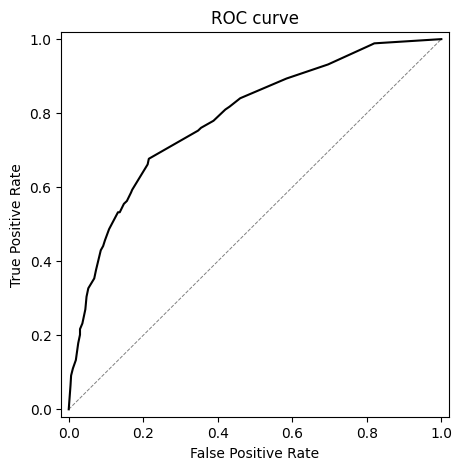

In [84]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# Random forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7843325422004794

In [87]:
aucs = []                                                       
 
for i in range(10, 201, 10):                                    
    rf = RandomForestClassifier(n_estimators=i, random_state=3) 
    rf.fit(X_train, y_train)                                    
 
    y_pred = rf.predict_proba(X_val)[:, 1]                      
    auc = roc_auc_score(y_val, y_pred)                          
    print('%s -> %.3f' % (i, auc))                              
 
    aucs.append(auc)      

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))    

10 -> 0.778
20 -> 0.802
30 -> 0.808
40 -> 0.813
50 -> 0.815
60 -> 0.815
70 -> 0.813
80 -> 0.816
90 -> 0.817
100 -> 0.815
110 -> 0.816
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.819
160 -> 0.818
170 -> 0.818
180 -> 0.818
190 -> 0.818
200 -> 0.819
0.813 +- 0.009
0.804 -- 0.823


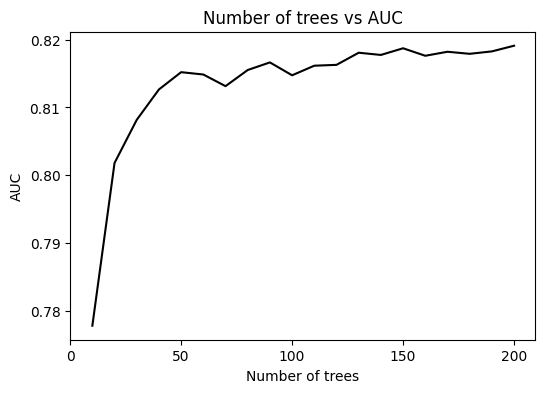

In [88]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()


In [89]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.800
20 -> 0.808
30 -> 0.810
40 -> 0.807
50 -> 0.808
60 -> 0.809
70 -> 0.810
80 -> 0.811
90 -> 0.809
100 -> 0.809
110 -> 0.809
120 -> 0.811
130 -> 0.811
140 -> 0.813
150 -> 0.813
160 -> 0.813
170 -> 0.813
180 -> 0.812
190 -> 0.813
200 -> 0.813

depth: 10
10 -> 0.794
20 -> 0.809
30 -> 0.810
40 -> 0.817
50 -> 0.818
60 -> 0.820
70 -> 0.820
80 -> 0.821
90 -> 0.821
100 -> 0.821
110 -> 0.822
120 -> 0.822
130 -> 0.822
140 -> 0.823
150 -> 0.823
160 -> 0.824
170 -> 0.825
180 -> 0.825
190 -> 0.826
200 -> 0.826

depth: 20
10 -> 0.789
20 -> 0.799
30 -> 0.808
40 -> 0.809
50 -> 0.811
60 -> 0.813
70 -> 0.818
80 -> 0.817
90 -> 0.819
100 -> 0.819
110 -> 0.820
120 -> 0.821
130 -> 0.821
140 -> 0.822
150 -> 0.823
160 -> 0.823
170 -> 0.823
180 -> 0.823
190 -> 0.824
200 -> 0.823



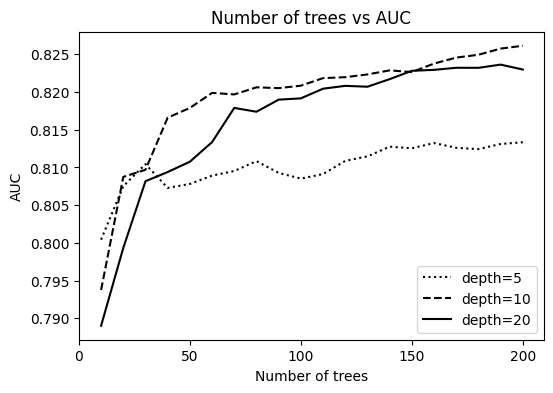

In [90]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [91]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.803
30 -> 0.816
50 -> 0.819
70 -> 0.821
90 -> 0.822
110 -> 0.824
130 -> 0.824
150 -> 0.826
170 -> 0.826
190 -> 0.827

min_samples_leaf: 5
10 -> 0.811
30 -> 0.823
50 -> 0.825
70 -> 0.826
90 -> 0.825
110 -> 0.825
130 -> 0.824
150 -> 0.825
170 -> 0.826
190 -> 0.825

min_samples_leaf: 10
10 -> 0.816
30 -> 0.821
50 -> 0.819
70 -> 0.820
90 -> 0.820
110 -> 0.822
130 -> 0.823
150 -> 0.823
170 -> 0.824
190 -> 0.824



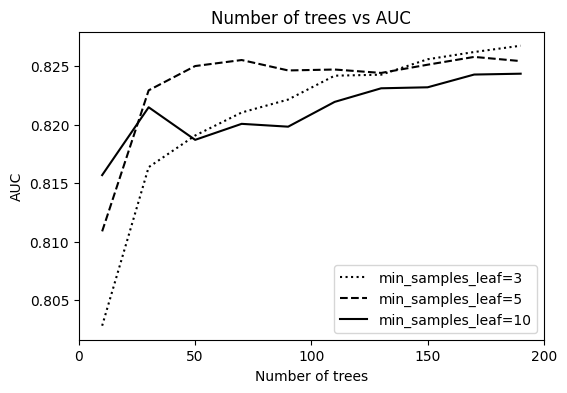

In [92]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

In [93]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [94]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8249467196241312

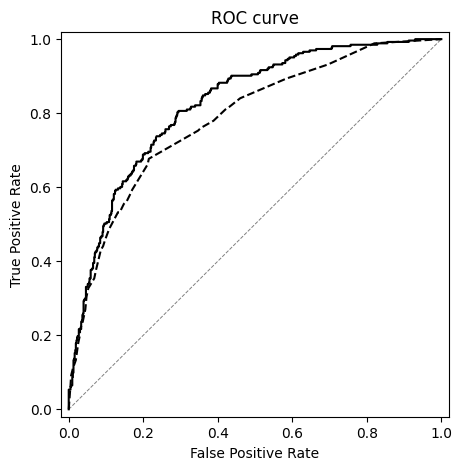

In [95]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# XGBoost

In [96]:
import xgboost as xgb

In [97]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [98]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [99]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [100]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [101]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [102]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [103]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [104]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81787
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99992	val-auc:0.80637
[99]	train-auc:0.99998	val-auc:0.80546


To capture this output, we can use

%%capture instruction that saves the result to output
- parse_xgb_output function that parses it

In [105]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [106]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [107]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

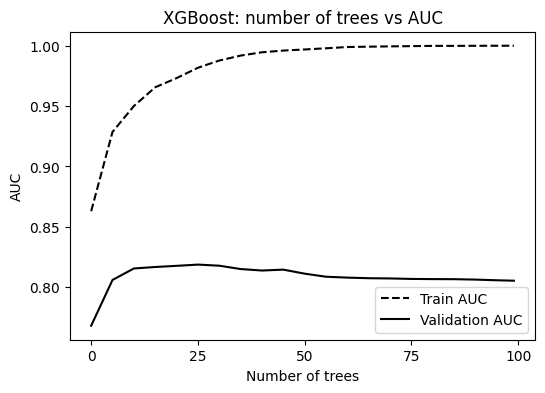

In [108]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

In [109]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82806
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[179]	train-auc:0.93962	val-auc:0.83648


In [110]:
y_pred_xgb = model.predict(dval)

In [111]:
roc_auc_score(y_val, y_pred_xgb)

0.8364807100821002

In [112]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7854738320699426
0.8249467196241312
0.8364807100821002


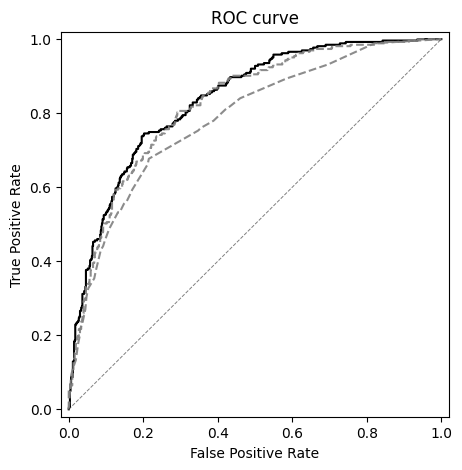

In [113]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# Final test

In [114]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [115]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [116]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [117]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [118]:
y_pred_xgb = xgb_final.predict(dtest)

In [119]:

print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8284907873515468
0.8322845901959826


# Bonus: feature importance
Decision trees

In [120]:
dt.feature_importances_

array([0.01387723, 0.04793733, 0.1226385 , 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18724799, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.24421676, 0.12152239, 0.01900104])

In [121]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', 0.013877231876069153),
 ('amount', 0.04793733336664824),
 ('assets', 0.12263850423922844),
 ('debt', 0.008332876385504902),
 ('expenses', 0.025090602575881322),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.18724798934476602),
 ('job=fixed', 0.006991445659436667),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348085),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676543),
 ('records', 0.24421675762093445),
 ('seniority', 0.12152238957522045),
 ('time', 0.019001041293152915)]

In [122]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
25,records,0.244217
12,income,0.187248
16,job=partime,0.172928
2,assets,0.122639
26,seniority,0.121522
1,amount,0.047937
24,price,0.030216
4,expenses,0.025091
27,time,0.019001
0,age,0.013877


In [123]:
df_importance = df_importance[df_importance.gain > 0]

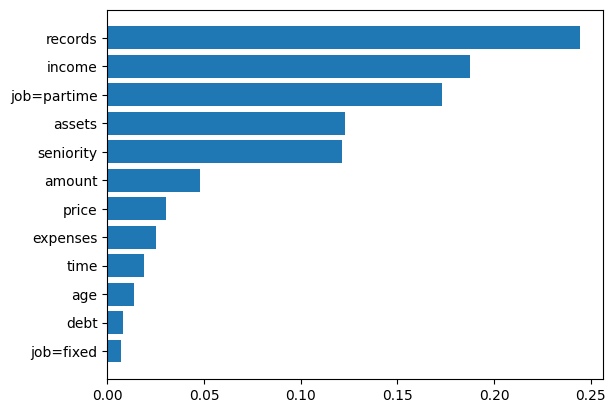

In [124]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

# Random forest

In [125]:
rf.feature_importances_

array([5.92966947e-02, 8.98379890e-02, 8.17096980e-02, 1.25360138e-02,
       3.81712781e-02, 3.43808333e-05, 6.13182361e-03, 2.43405025e-02,
       8.17696304e-03, 2.97530135e-03, 1.80518272e-02, 0.00000000e+00,
       1.55162253e-01, 5.02977668e-02, 9.36368584e-03, 2.90964052e-03,
       6.00347812e-02, 0.00000000e+00, 1.86072396e-04, 7.46191680e-03,
       1.84642689e-03, 5.80133352e-03, 0.00000000e+00, 4.34038088e-05,
       7.00603681e-02, 1.39427862e-01, 1.23943156e-01, 3.21988612e-02])

In [126]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.155162
25,records,0.139428
26,seniority,0.123943
1,amount,0.089838
2,assets,0.081710
24,price,0.070060
16,job=partime,0.060035
0,age,0.059297
13,job=fixed,0.050298
4,expenses,0.038171


In [127]:
df_importance = df_importance[df_importance.gain > 0.01]

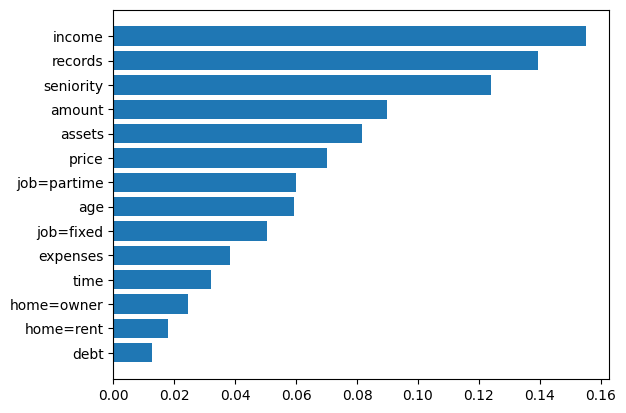

In [128]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

# XGBoost

In [129]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records', 20.205888748168945),
 ('job=partime', 19.57184410095215),
 ('job=fixed', 14.70346736907959),
 ('home=owner', 12.168286323547363),
 ('seniority', 10.932044982910156),
 ('income', 8.67631721496582),
 ('assets', 5.918308734893799),
 ('amount', 5.400781154632568),
 ('time', 5.017590522766113),
 ('home=parents', 4.499092102050781),
 ('home=rent', 4.028717994689941),
 ('price', 3.794684648513794),
 ('expenses', 3.5896708965301514),
 ('age', 3.318182945251465),
 ('debt', 2.9418532848358154),
 ('marital=separated', 2.6418800354003906),
 ('home=private', 2.462043046951294),
 ('marital=married', 2.4277892112731934),
 ('home=other', 2.3016984462738037),
 ('job=freelance', 2.2592973709106445),
 ('job=others', 1.6187658309936523),
 ('home=ignore', 0.7887505888938904)]

In [130]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165.0),
 ('amount', 162.0),
 ('assets', 142.0),
 ('income', 133.0),
 ('seniority', 119.0),
 ('age', 109.0),
 ('expenses', 92.0),
 ('debt', 63.0),
 ('records', 60.0),
 ('time', 29.0),
 ('home=parents', 22.0),
 ('job=partime', 21.0),
 ('job=fixed', 19.0),
 ('marital=separated', 13.0),
 ('home=private', 12.0),
 ('marital=married', 11.0),
 ('home=rent', 8.0),
 ('home=owner', 6.0),
 ('home=ignore', 5.0),
 ('job=freelance', 4.0),
 ('home=other', 3.0),
 ('job=others', 1.0)]

In [131]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

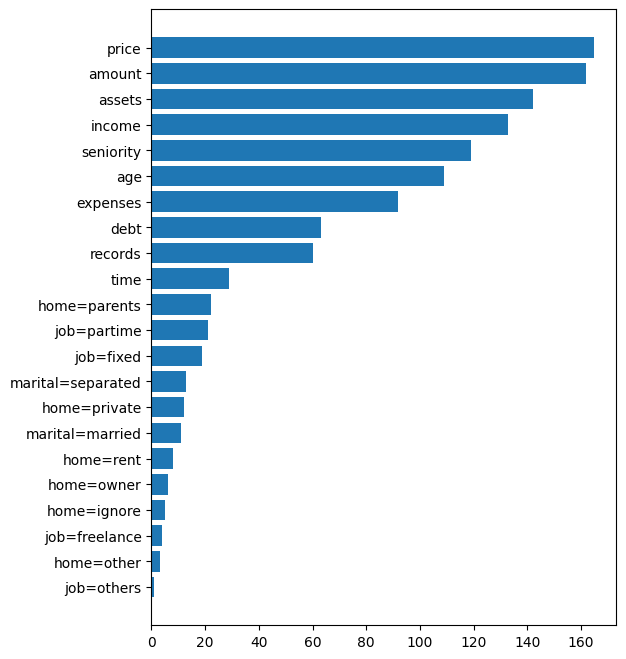

In [132]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

# Bonus: Extremely randomized trees
Similar to random forest, but more random. Instead of selecting the best split among all posible splits, ET picks a few candidate splits at random and then select the best one among them.

In [133]:
from sklearn.ensemble import ExtraTreesClassifier

In [134]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.764
20 -> 0.776
30 -> 0.779
40 -> 0.783
50 -> 0.787
60 -> 0.790
70 -> 0.793
80 -> 0.792
90 -> 0.794
100 -> 0.790
110 -> 0.796
120 -> 0.790
130 -> 0.793
140 -> 0.798
150 -> 0.793
160 -> 0.791
170 -> 0.791
180 -> 0.797
190 -> 0.798
200 -> 0.796
